### Task: Using Multiple Classification methods to idenfity high propensity customers

**Goal:** The goal of this project is to identify more effective ways for people who are likely to subsribe to our product and compare their performances to identify the best model.

**Expected Data Source:**
Customer's information like demographic, product usages, website activities, and other product connections etc.

**Techniques Expected to Use:**
Data cleaning, preprocessing, column transformations, feature selections, classifier selections, performation evaluation and comparion with following 4 methods:
1. KNN
2. LOGISTICRegression
3. DecisionTree
4. SVM

**Expected Results:** 
I expect to be able to identify high propensity customer with approriate threshold and also identify feature sets that significantly contribute to the accuracy of models in detecting high propensity customers

**Importance of the Question:** 
Understand customer's intent, help marketing stateholders to launch cross-sell campaigns/promos to improve conversion rate/revenue by targeting right customers with right messages. 

**Data:**
Online Shoppers Purchasing Intention Dataset
Link: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.


In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error as ms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector as sf
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score as score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_selector, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import accuracy_score, auc
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,precision_recall_fscore_support, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree, export_text
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.svm import SVC, SVR
import time

The data is loaded below.

In [2]:
mkg = pd.read_csv('online_shoppers_intention.csv', sep = ',')

In [3]:
#bank data
mkg.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
mkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
mkg = mkg.dropna()
mkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
X = mkg.drop(['Revenue'], axis =1)
# mkg['y'] = np.where(mkg['y'] =='yes',1,0)
y = mkg['Revenue']

In [7]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [8]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [9]:
mkg[['Revenue']].value_counts()

Revenue
False      10422
True        1908
Name: count, dtype: int64

In [10]:
revenue_map = {False: 0, True: 1}

In [11]:
mkg['Revenue'] = mkg['Revenue'].map(revenue_map)

## Data Processing

In [12]:
# ct = make_column_transformer(
# (StandardScaler(),make_column_selector(dtype_include=np.number)),  # all numerical columns
# (OneHotEncoder(drop = 'if_binary'),make_column_selector(dtype_include=object))  # all categorical columns
# )  # all categorical columns

In [13]:
ct = make_column_transformer(
(StandardScaler(),make_column_selector(dtype_include=np.number)),  # all numerical columns
(OneHotEncoder(),['VisitorType','Weekend','Month'])  # all categorical columns except y_true
)  # all categorical columns

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [15]:
ct.fit_transform(X)

array([[-0.69699296, -0.4571914 , -0.3964779 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.        ,
         0.        ,  0.        ]])

In [16]:
ct.get_feature_names_out()

array(['standardscaler__Administrative',
       'standardscaler__Administrative_Duration',
       'standardscaler__Informational',
       'standardscaler__Informational_Duration',
       'standardscaler__ProductRelated',
       'standardscaler__ProductRelated_Duration',
       'standardscaler__BounceRates', 'standardscaler__ExitRates',
       'standardscaler__PageValues', 'standardscaler__SpecialDay',
       'standardscaler__OperatingSystems', 'standardscaler__Browser',
       'standardscaler__Region', 'standardscaler__TrafficType',
       'onehotencoder__VisitorType_New_Visitor',
       'onehotencoder__VisitorType_Other',
       'onehotencoder__VisitorType_Returning_Visitor',
       'onehotencoder__Weekend_False', 'onehotencoder__Weekend_True',
       'onehotencoder__Month_Aug', 'onehotencoder__Month_Dec',
       'onehotencoder__Month_Feb', 'onehotencoder__Month_Jul',
       'onehotencoder__Month_June', 'onehotencoder__Month_Mar',
       'onehotencoder__Month_May', 'onehotencoder__Mon

In [17]:
X = pd.DataFrame(ct.fit_transform(X),columns= ct.get_feature_names_out())

In [18]:
X

,standardscaler__Administrative,standardscaler__Administrative_Duration,standardscaler__Informational,standardscaler__Informational_Duration,standardscaler__ProductRelated,standardscaler__ProductRelated_Duration,standardscaler__BounceRates,standardscaler__ExitRates,standardscaler__PageValues,standardscaler__SpecialDay,...,onehotencoder__Month_Aug,onehotencoder__Month_Dec,onehotencoder__Month_Feb,onehotencoder__Month_Jul,onehotencoder__Month_June,onehotencoder__Month_Mar,onehotencoder__Month_May,onehotencoder__Month_Nov,onehotencoder__Month_Oct,onehotencoder__Month_Sep
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [20]:
X_train

,standardscaler__Administrative,standardscaler__Administrative_Duration,standardscaler__Informational,standardscaler__Informational_Duration,standardscaler__ProductRelated,standardscaler__ProductRelated_Duration,standardscaler__BounceRates,standardscaler__ExitRates,standardscaler__PageValues,standardscaler__SpecialDay,...,onehotencoder__Month_Aug,onehotencoder__Month_Dec,onehotencoder__Month_Feb,onehotencoder__Month_Jul,onehotencoder__Month_June,onehotencoder__Month_Mar,onehotencoder__Month_May,onehotencoder__Month_Nov,onehotencoder__Month_Oct,onehotencoder__Month_Sep
4252,0.808283,-0.018773,-0.396478,-0.244931,-0.601062,-0.577141,0.057926,0.013936,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1566,-0.696993,-0.457191,-0.396478,-0.244931,-0.556092,-0.388665,-0.457683,-0.200423,2.366158,-0.308821,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6901,-0.395938,-0.428906,-0.396478,-0.244931,-0.668518,-0.616404,-0.457683,-0.063233,-0.317178,-0.308821,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1378,-0.395938,-0.403450,-0.396478,-0.244931,-0.151358,-0.272000,-0.457683,-0.530205,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1261,-0.696993,-0.457191,-0.396478,-0.244931,-0.331240,-0.333185,0.027596,0.132463,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10159,-0.395938,-0.378936,0.390859,-0.244931,3.783551,3.731879,-0.370897,-0.524241,-0.116274,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9810,2.915670,0.439983,1.178195,0.941624,0.365801,0.032162,-0.378359,-0.545375,1.285764,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2477,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.618077,0.573535,1.583041,-0.317178,2.707630,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4274,-0.395938,-0.406278,-0.396478,-0.244931,-0.376210,-0.485342,0.131584,0.289540,-0.317178,3.713114,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
y_train

4252     False
1566      True
6901     False
1378     False
1261     False
         ...  
10159     True
9810     False
2477     False
4274     False
5553     False
Name: Revenue, Length: 9864, dtype: bool

In [22]:
## Baseline
y_train.value_counts()
baseline = 1523/(1523+8341)
baseline 

0.15439983779399838

Duration: 0.7847208976745605
Accuracy_train: 0.9001419302514193
Accuracy_test: 0.8815896188158961
Precison_test: 0.6651376146788991
Recall_test: 0.3983516483516483
F1_score: 0.49828178694158076
[[2029   73]
 [ 219  145]]
[[2029   73]
 [ 219  145]]


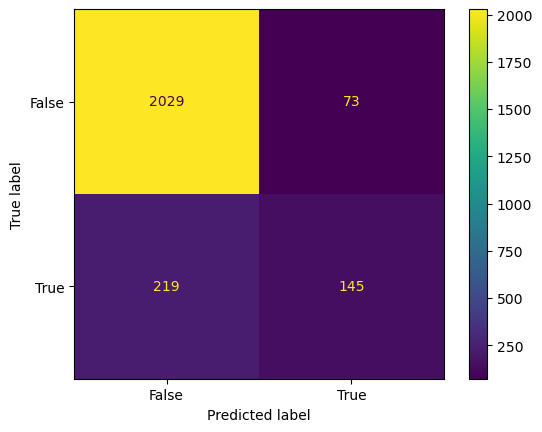

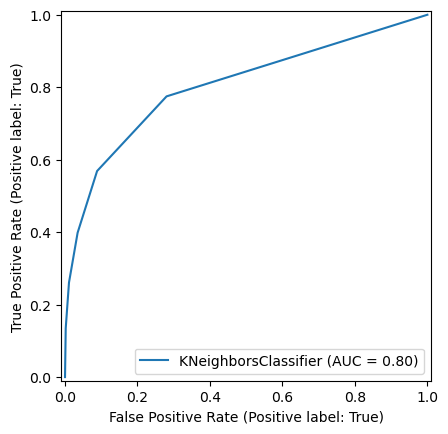

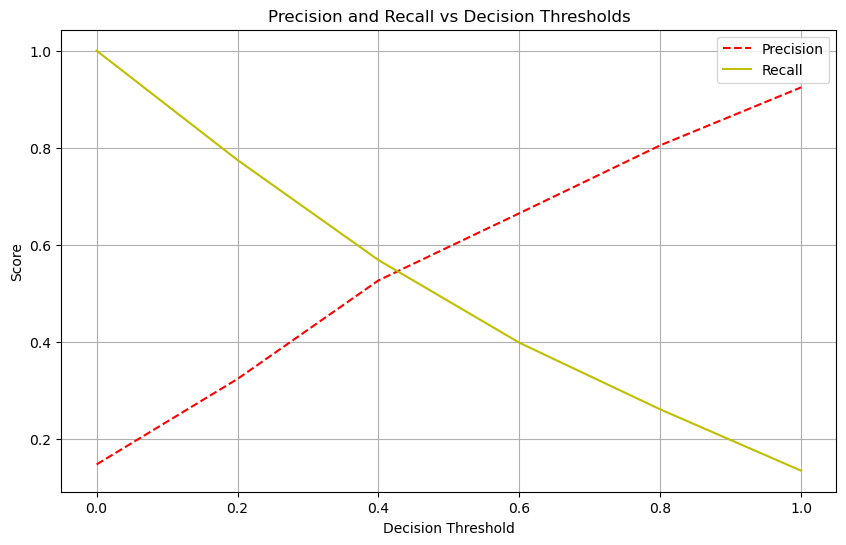

In [23]:
### 1) KNeighborsClassifier



start = time.time()
knn_model = KNeighborsClassifier().fit(X_train,y_train)
acc_train = accuracy_score(knn_model.predict(X_train), y_train)
acc_test = accuracy_score(knn_model.predict(X_test), y_test)
precison_test = precision_score(y_test, knn_model.predict(X_test))
recall_test = recall_score(y_test, knn_model.predict(X_test))
f1_score_test = f1_score(knn_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print("Precison_test:", precison_test)
print("Recall_test:", recall_test)
print("F1_score:", f1_score_test)
print(confusion_matrix(y_test, knn_model.predict(X_test)))

print(confusion_matrix(y_test, knn_model.predict(X_test)))


# Confusion Matrix Display
cm = confusion_matrix(y_test, knn_model.predict(X_test), labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(knn_model, X_test, y_test)

# Lift chart

y_scores = knn_model.predict_proba(X_test)[:, 1] 
y_test_numeric = np.array([1 if y == 1 else 0 for y in y_test])

precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_scores)

# Plot Precision-Recall vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "r--", label="Precision")
plt.plot(thresholds, recall[:-1], "y-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Thresholds")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Duration: 0.07139301300048828
Accuracy_train: 0.8835158150851582
Accuracy_test: 0.8905109489051095
Precison_test: 0.7611111111111111
Recall_test: 0.37637362637362637
F1_score: 0.5036764705882353
[[2059   43]
 [ 227  137]]


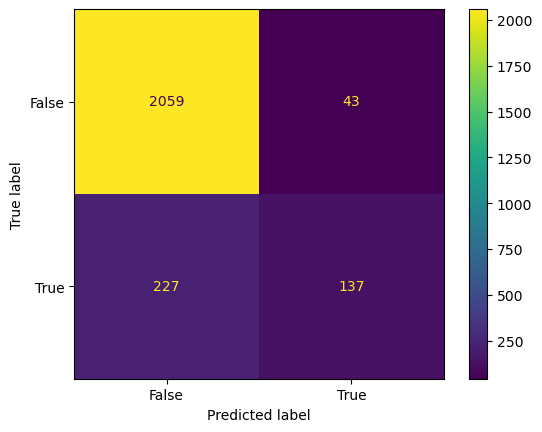

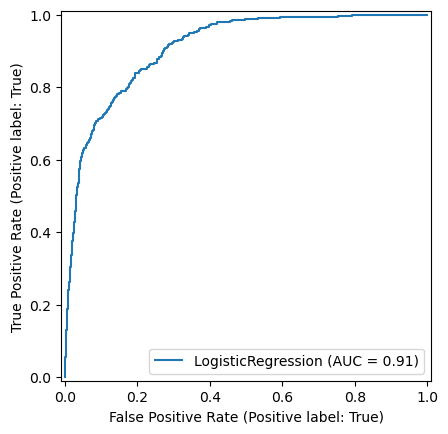

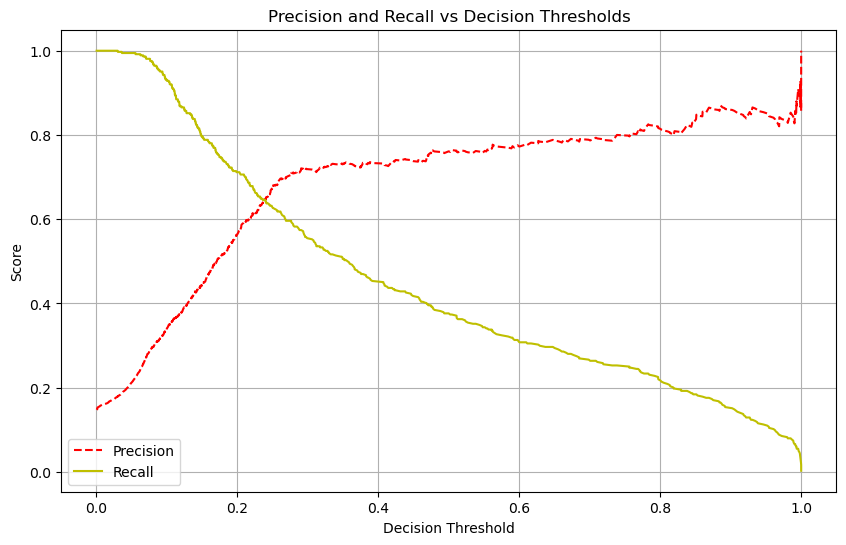

In [24]:
### 2) LogisticRegression



start = time.time()
lg_model = LogisticRegression().fit(X_train,y_train)
acc_train = accuracy_score(lg_model.predict(X_train), y_train)
acc_test = accuracy_score(lg_model.predict(X_test), y_test)
precison_test = precision_score(y_test, lg_model.predict(X_test))
recall_test = recall_score(y_test, lg_model.predict(X_test))
f1_score_test = f1_score(lg_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print("Precison_test:", precison_test)
print("Recall_test:", recall_test)
print("F1_score:", f1_score_test)
print(confusion_matrix(y_test, lg_model.predict(X_test)))


## Confusion Matrix Display
cm = confusion_matrix(y_test, lg_model.predict(X_test), labels=lg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lg_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(lg_model, X_test, y_test)

# Lift chart

y_scores = lg_model.predict_proba(X_test)[:, 1] 
y_test_numeric = np.array([1 if y == 1 else 0 for y in y_test])

precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_scores)

# Plot Precision-Recall vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "r--", label="Precision")
plt.plot(thresholds, recall[:-1], "y-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Thresholds")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Duration: 0.028792142868041992
Accuracy_train: 0.8901054339010543
Accuracy_test: 0.8909164639091647
Precison_test: 0.7188940092165899
Recall_test: 0.42857142857142855
F1_score: 0.5370051635111877
[[2041   61]
 [ 208  156]]


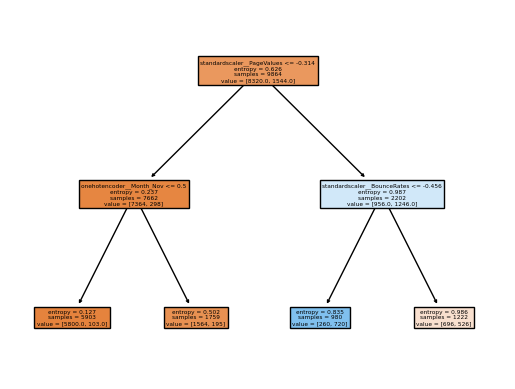

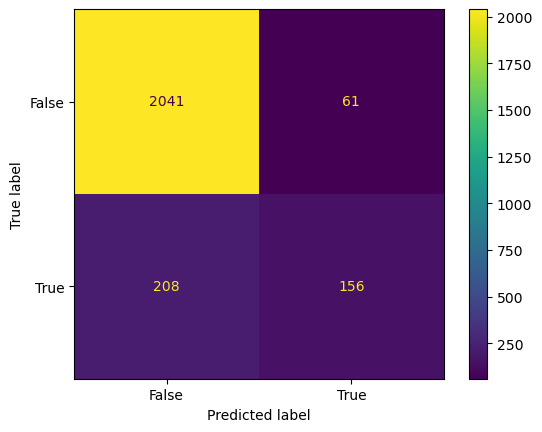

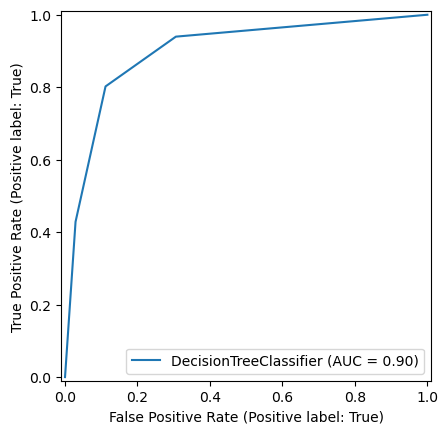

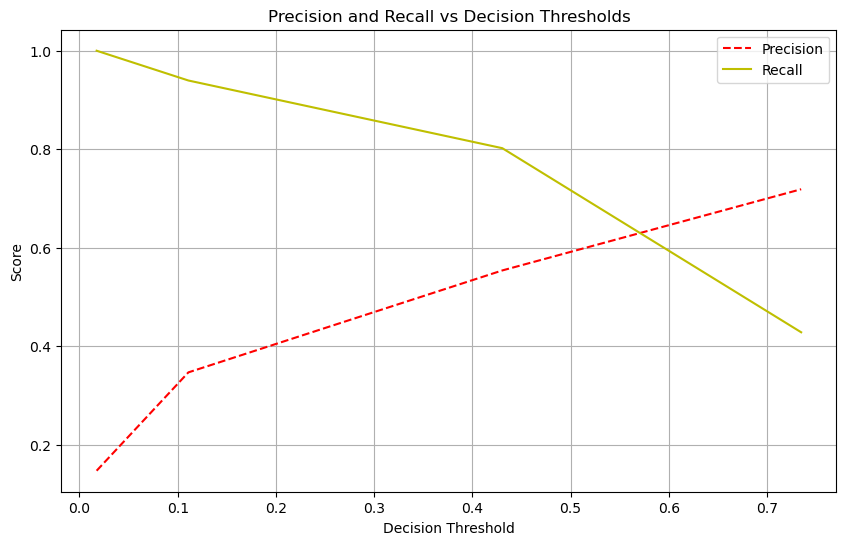

In [25]:
### 3) DecisionTreeClassifier

start = time.time()
dt_model = DT(criterion='entropy', max_depth = 2).fit(X_train,y_train)
acc_train = accuracy_score(dt_model.predict(X_train), y_train)
acc_test = accuracy_score(dt_model.predict(X_test), y_test)
precison_test = precision_score(y_test, dt_model.predict(X_test))
recall_test = recall_score(y_test, dt_model.predict(X_test))
f1_score_test = f1_score(dt_model.predict(X_test), y_test)
end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print("Precison_test:", precison_test)
print("Recall_test:", recall_test)
print("F1_score:", f1_score_test)
print(confusion_matrix(y_test, dt_model.predict(X_test)))
plot_tree(dt_model, filled = True, feature_names = X.columns)


## Confusion Matrix Display
cm = confusion_matrix(y_test, dt_model.predict(X_test), labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)

# Lift chart

y_scores = dt_model.predict_proba(X_test)[:, 1] 
y_test_numeric = np.array([1 if y == 1 else 0 for y in y_test])

precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_scores)

# Plot Precision-Recall vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "r--", label="Precision")
plt.plot(thresholds, recall[:-1], "y-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Thresholds")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Duration: 6.611144065856934
Accuracy_train: 0.9042984590429846
Accuracy_test: 0.902676399026764
Precison_test: 0.7649572649572649
Recall_test: 0.49175824175824173
F1_score: 0.5986622073578596
[[2047   55]
 [ 185  179]]


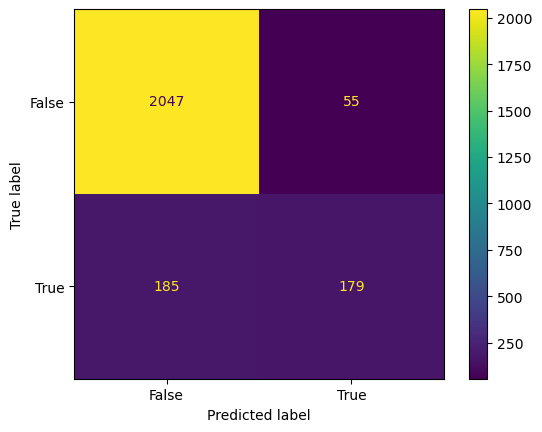

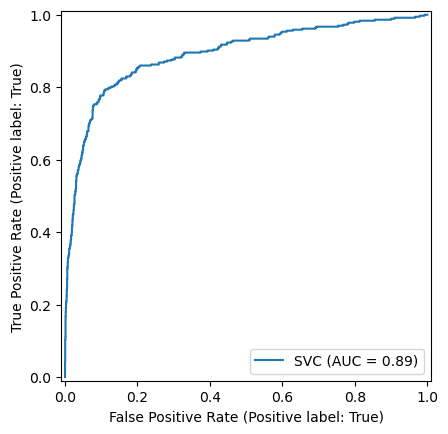

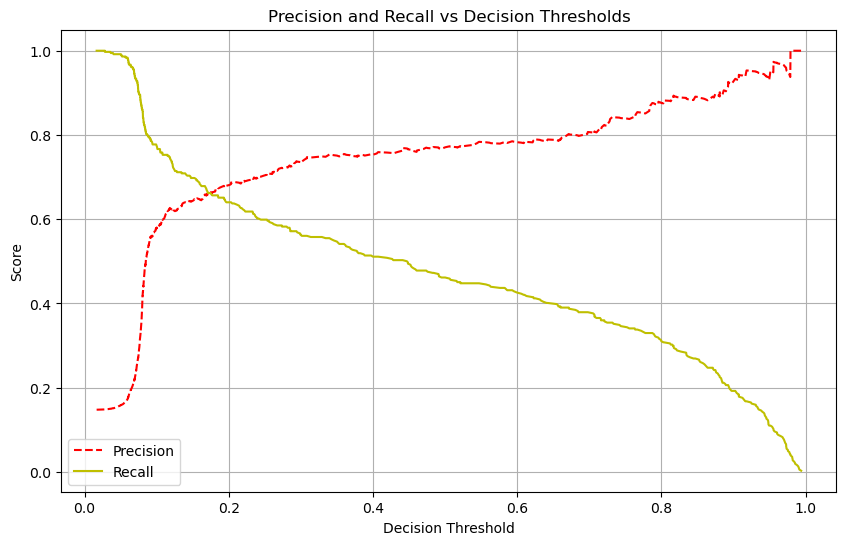

In [26]:
### 4) SVM


start = time.time()

svm_model = SVC(kernel='rbf', degree=3, gamma='scale', probability=True).fit(X_train,y_train)

acc_train = accuracy_score(svm_model.predict(X_train), y_train)
acc_test = accuracy_score(svm_model.predict(X_test), y_test)
precison_test = precision_score(y_test, svm_model.predict(X_test))
recall_test = recall_score(y_test, svm_model.predict(X_test))
f1_score_test = f1_score(svm_model.predict(X_test), y_test)

end = time.time()

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print("Precison_test:", precison_test)
print("Recall_test:", recall_test)
print("F1_score:", f1_score_test)
print(confusion_matrix(y_test, svm_model.predict(X_test)))


## Confusion Matrix Display
cm = confusion_matrix(y_test, svm_model.predict(X_test), labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svm_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)

# Lift chart

y_scores = svm_model.predict_proba(X_test)[:, 1] 
y_test_numeric = np.array([1 if y == 1 else 0 for y in y_test])

precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_scores)

# Plot Precision-Recall vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "r--", label="Precision")
plt.plot(thresholds, recall[:-1], "y-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Thresholds")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [26]:
### SVM - SequentialFeatureSelector, takes too long

# sfs_svm = sf(svm_model, n_features_to_select=6)
# sfs_svm_model = sfs_svm.fit(X_train, y_train)


In [27]:
# https://www.geeksforgeeks.org/machine-learning-explainability-using-permutation-importance/
# https://www.aporia.com/learn/feature-importance/explain-ml-models-with-permutation-importance/
# Permutation importance is to determine which features have the biggest impact on predictions (I used it on train dataset)
# Permutation importance is computed once a model has been trained on the training set. 
# It inquires: If the data points of a single attribute are randomly shuffled (in the validation set), 
# leaving all remaining data as is, what would be the ramifications on accuracy, using this new data?
# Ideally, random reordering of a column ought to result in reduced accuracy, 
# since the new data has little or no correlation with real-world statistics.
# create permutation importance object using model and fit on test set 

## Example from Tryit8.1

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax
    

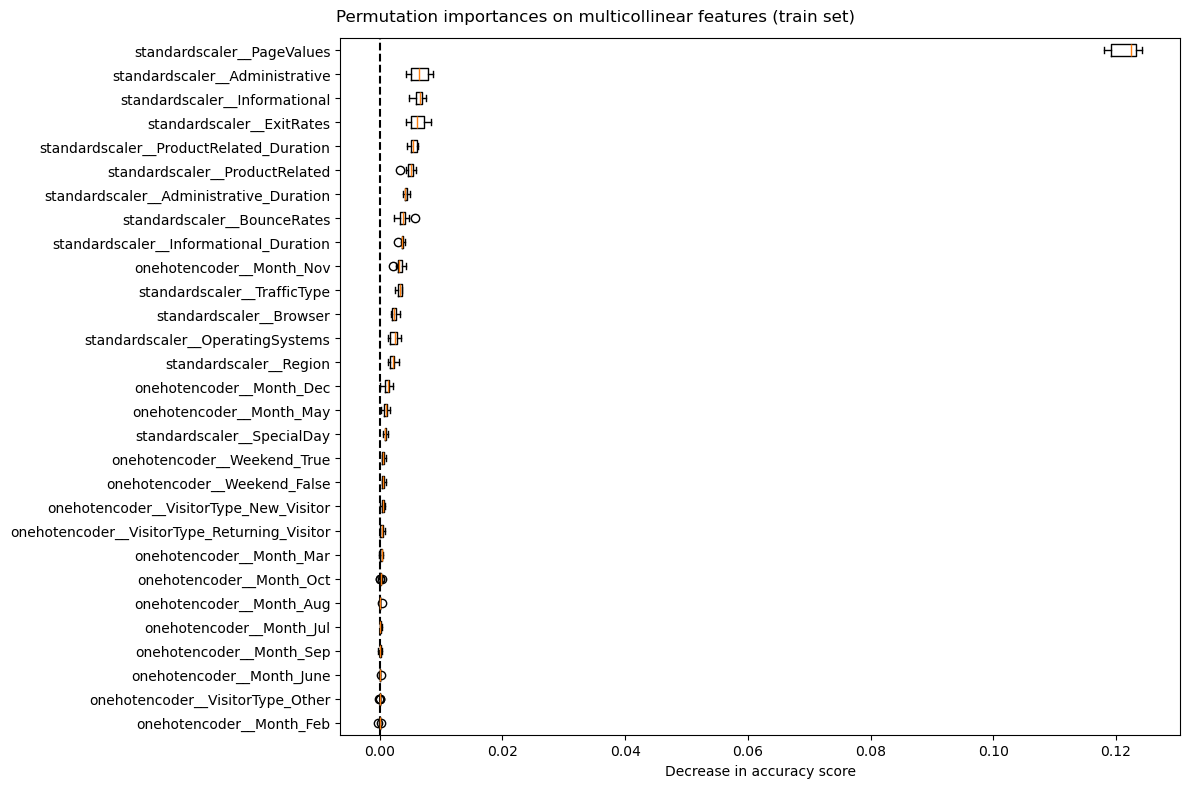

In [28]:
result = permutation_importance(svm_model, X_train, y_train, n_repeats=10, random_state=0)
mdi_importances = pd.Series(result, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(result)
tree_indices = np.arange(0, len(result)) + 0.5

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))

plot_permutation_importance(svm_model, X_train, y_train, ax1)
ax1.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

#### Interpretation:
The values at the top of the table are the most important features in our model, while those at the bottom matter least.
The first number in each row indicates how much model performance decreased with random shuffling, using the same performance metric as the model (in this case, accuracy score).
The number after the ± measures how performance varied from one-reshuffling to the next, i.e., degree of randomness across multiple shuffles.
Negative values for permutation importance indicate that the predictions on the shuffled (or noisy) data are more accurate than the real data. This means that the feature does not contribute much to predictions (importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is more common with small datasets.
In our example, the top 3 features are PageValues, Administrative, Informational while the 2 least significant are month, VisitorType.

In [28]:
### GridSearchCV - tune parameters

In [27]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [28]:
help(SVC())

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `

In [ ]:
start = time.time()

parameters = {
              'C' : [0.01,0.1,0.5,0.6,0.7,0.7,0.8,0.9,1],
              'degree': [1,2,3],
              'gamma': ['scale', 'auto'],
              'decision_function_shape' : ['ovo', 'ovr']
             }
grid = GridSearchCV(svm_model,param_grid = parameters)
grid_model = grid.fit(X_train, y_train)

acc_train = accuracy_score(grid_model.predict(X_train), y_train)
acc_test = accuracy_score(grid_model.predict(X_test), y_test)
precison_test = precision_score(y_test, svm_model.predict(X_test))
recall_test = recall_score(y_test, svm_model.predict(X_test))
f1_score_test = f1_score(grid_model.predict(X_test), y_test)
end = time.time()

print("Best Parameters:", grid_model.best_params_)

print("Duration:", end-start)
print("Accuracy_train:", acc_train)
print("Accuracy_test:", acc_test)
print("Precison_test:", precison_test)
print("Recall_test:", recall_test)
print("F1_score:", f1_score_test)
print(confusion_matrix(y_test, grid_model.predict(X_test)))


## Confusion Matrix Display
cm = confusion_matrix(y_test, grid_model.predict(X_test), labels=grid_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_model.classes_)
disp.plot()
plt.show()

## ROC
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

# Lift chart

y_scores = grid_model.predict_proba(X_test)[:, 1] 
y_test_numeric = np.array([1 if y == 1 else 0 for y in y_test])

precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_scores)

# Plot Precision-Recall vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "r--", label="Precision")
plt.plot(thresholds, recall[:-1], "y-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Thresholds")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Comparision

In [30]:
res_dict = {'model': ['KNN', 'Logistic Regression', 'DecisionTree', 'SVC'],
           'train score': [0.90, 0.89, 0.89,0.90],
           'test score': [0.88, 0.89, 0.89,0.90],
            
           'precision score': [0.66, 0.76, 0.72,0.76],
           'recall score': [0.40, 0.38, 0.43,0.49],
            
           'f1 score': [0.48, 0.49, 0.55,0.58],
           'average fit time': [0.278, 0.11, 0.02,2.11],}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df

,train score,test score,precision score,recall score,f1 score,average fit time
model,,,,,,
KNN,0.90,0.88,0.66,0.40,0.48,0.278
Logistic Regression,0.89,0.89,0.76,0.38,0.49,0.110
DecisionTree,0.89,0.89,0.72,0.43,0.55,0.020
SVC,0.90,0.90,0.76,0.49,0.58,2.110


1) The test score are very close to each other for all 4 classifiers, SVC is performing from test score and f1_score
2) However SVC took relatively longer fitting time than other models (but given the small dataset, it is still in a few seconds)


## Permutation Vs Shap

Permutation importance and SHAP importance are alternative ways of measuring feature importance. The main difference is that permutation importance is based on the decrease in model performance, while SHAP importance is based on magnitude of feature attributions.


In [33]:
# pip install --upgrade pyspark
# pip install shap
# Shapley Values
# Reference: Using SHAP Values for Model Interpretability in Machine Learning
# https://www.kdnuggets.com/2023/08/shap-values-model-interpretability-machine-learning.html#:~:text=Specifically%2C%20SHAP%20values%20are%20calculated,each%20sample%20in%20the%20dataset.

## Shap Values

In [34]:
import shap
shap.initjs()

In [35]:
# Calculate SHAP values
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.LinearExplainer.html
# https://snyk.io/advisor/python/shap/functions/shap.LinearExplainer
explainer = shap.LinearExplainer(lg_model,X_test)
shap_values = explainer.shap_values(X_test)
shap_values

array([[-0.00664741,  0.01665415, -0.01681575, ..., -0.20723837,
        -0.01209602, -0.01226122],
       [-0.02228837,  0.01964651, -0.01681575, ..., -0.20723837,
        -0.01209602, -0.01226122],
       [ 0.00117307, -0.00212866, -0.01681575, ...,  0.58983228,
        -0.01209602, -0.01226122],
       ...,
       [ 0.05591643, -0.04025822, -0.01681575, ...,  0.58983228,
        -0.01209602, -0.01226122],
       [-0.02228837,  0.01964651, -0.01681575, ..., -0.20723837,
        -0.01209602, -0.01226122],
       [-0.02228837,  0.01964651,  0.0175021 , ..., -0.20723837,
        -0.01209602, -0.01226122]])

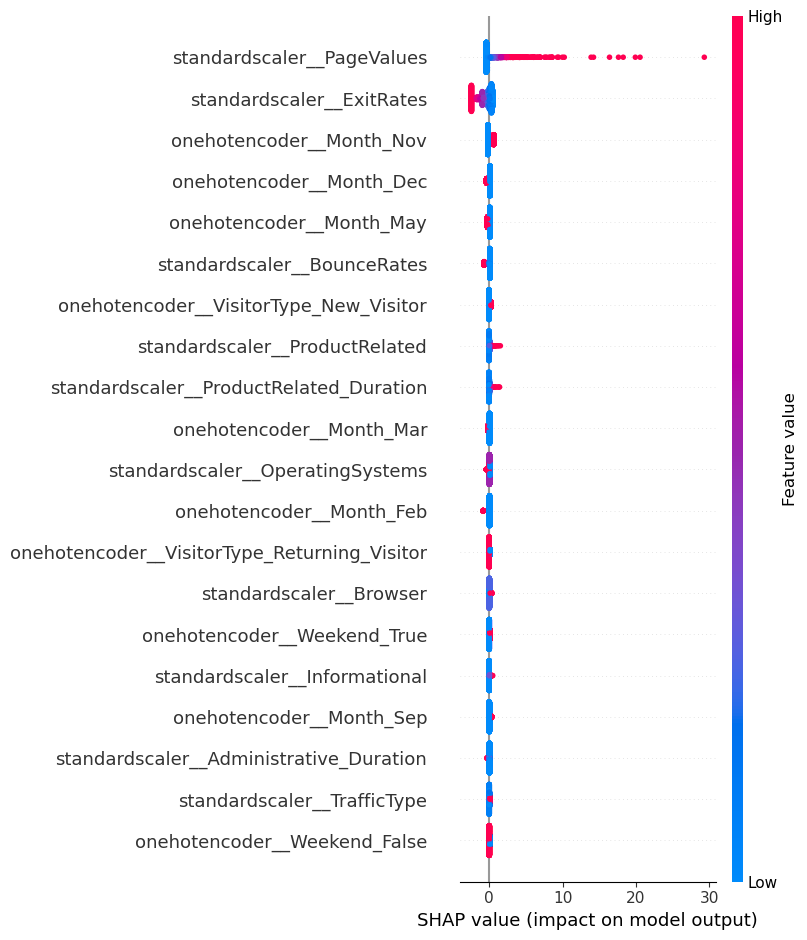

In [36]:
# Summarize the effects of features
# shap.summary_plot(shap_values, np.exp(test_X.values.astype(float)))
# feature_list = ['odometer']
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values.astype(float), X_test.astype(float))

## Findings & Recommendations

1) SVM model is performing better than KNN, Decision Tree or Logistic Regression with best F1 score.
2) From the shap analysis, we can see some positive indicators, such as the more the pagevalues, the longer the product related duration, the more the likely customer convert, which makes sense since stronger engagement shows the intention. 
3) Also from shap analytis, we can see some negative indicatiors, such as the more exit or bounce rate, the less likely to convert, which apprarently shows less interest.
4) If we can figure out way to improve the page to be more attrative, customers could spend more time on the pages then ultimately improve the conversion rate. 
5) Also if we can use this model to only target high propensity customers with customerized email messages, the conversion rate could be improved accordingly as well. 